### Get Data from the API

In [1]:
import requests, json

In [2]:
url = "https://h2ox-api.herokuapp.com/api/"

In [3]:
r = requests.get(
    url = url,
    params = {"reservoir":"kabini", "date":"2014-03-03"},
    auth = ("<username>","<password>")
)

### Plot data with Pandas and Matplotlib

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
data = json.loads(r.text)

In [7]:
df_historic = pd.DataFrame.from_records(data['historic'])
df_future = pd.DataFrame.from_records(data['future'])
df_predicted = pd.DataFrame.from_records(data['predicted'])

In [8]:
df_historic['x'] = pd.to_datetime(df_historic['x'])
df_future['x'] = pd.to_datetime(df_future['x'])
df_predicted['x'] = pd.to_datetime(df_predicted['x'])

<AxesSubplot:xlabel='x'>

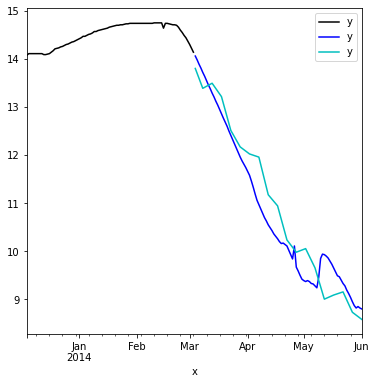

In [9]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
df_historic.set_index('x').plot(ax=ax, c='k', label='historic')
df_future.set_index('x').plot(ax=ax,c='b', label='observed')
df_predicted.set_index('x').plot(ax=ax, c='c', label='predicted')